In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import is_object_dtype
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv("./testlizenz-tuebingen-dataliteracy4students_1706088512814.csv", sep=";", encoding="unicode_escape")
df.head()

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein
0,3600813965,NaN,"2,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,"58,","2,",NaN,"58,","950,","16,38",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8111000,8111,NaN,"950,",NaN,NaN,"16,38",NaN,NaN,NaN,Stuttgart,Stuttgart,70374,Bad Cannstatt,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,0,2024-01-07,0,0,0
1,3600228249,NaN,"1,",0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,"30,",",5",NaN,"30,","550,","18,33",0,NaN,NaN,"50,",",1",NaN,miete,Wohn,8,8111000,8111,"50,","550,","600,","20,","18,33",NaN,NaN,"1,67",Stuttgart,Stuttgart,70376,Bad Cannstatt,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,-1,NaN,0,0,0
2,3600178856,1.0,"3,",0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,NaN,"75,",",5",NaN,"75,","960,","12,8",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8111000,8111,"290,","960,","1250,","16,67","12,8",NaN,NaN,NaN,Stuttgart,Stuttgart,70599,Birkach,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,1,0,0,2023.0,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,1,0,-1
3,3600126466,1.0,"3,",0,1,1,1,1,0,0,0,0,0,NaN,1,1,0,Zentral,0,1,1,0,1,0,0,1,0,0,0,0,2016.0,"90,","4,","6,","90,","1800,","20,",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8111000,8111,"270,","1800,","2070,","23,","20,",NaN,NaN,NaN,Stuttgart,Stuttgart,70197,West,Rotebühl,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0
4,3600106670,NaN,"3,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"66,",NaN,NaN,"66,","1000,","15,15",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8111000,8111,"200,","1000,","1200,","18,18","15,15",NaN,NaN,NaN,Stuttgart,Stuttgart,70376,Münster,Münster,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0


In [149]:
df["objekttyp"].unique()

array(['Wohnung'], dtype=object)

In [ ]:
df = df[df["objekttyp"]=="Wohnung"]

In [3]:
df['startyear'] = df['startdate'].str[:4] 
df['endyear'] = df['enddate'].str[:4] 
df_copy = df.copy()

In [4]:
for column in df.columns:
    if is_object_dtype(df[column]):
        if df[column].str.contains(',').any(): 
            df[column] = df[column].str.replace(',', '.').astype(float)
            df_copy[column] = df_copy[column].str.replace(',', '.').astype(float)
df_copy

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,startyear,endyear
0,3600813965,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,58.0,2.0,NaN,58.0,950.0,16.38,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,NaN,950.0,NaN,NaN,16.38,NaN,NaN,NaN,Stuttgart,Stuttgart,70374,Bad Cannstatt,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,0,2024-01-07,0,0,0,2023,2024
1,3600228249,NaN,1.0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,30.0,0.5,NaN,30.0,550.0,18.33,0,NaN,NaN,50.0,0.1,NaN,miete,Wohn,8,8111000,8111,50.0,550.0,600.0,20.00,18.33,NaN,NaN,1.67,Stuttgart,Stuttgart,70376,Bad Cannstatt,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,-1,NaN,0,0,0,2023,NaN
2,3600178856,1.0,3.0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,NaN,75.0,0.5,NaN,75.0,960.0,12.80,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,290.0,960.0,1250.0,16.67,12.80,NaN,NaN,NaN,Stuttgart,Stuttgart,70599,Birkach,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,1,0,0,2023.0,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,1,0,-1,2023,NaN
3,3600126466,1.0,3.0,0,1,1,1,1,0,0,0,0,0,NaN,1,1,0,Zentral,0,1,1,0,1,0,0,1,0,0,0,0,2016.0,90.0,4.0,6.0,90.0,1800.0,20.00,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,270.0,1800.0,2070.0,23.00,20.00,NaN,NaN,NaN,Stuttgart,Stuttgart,70197,West,Rotebühl,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0,2023,NaN
4,3600106670,NaN,3.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,66.0,NaN,NaN,66.0,1000.0,15.15,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,200.0,1000.0,1200.0,18.18,15.15,NaN,NaN,NaN,Stuttgart,Stuttgart,70376,Münster,Münster,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106715,622154587,1.0,3.5,0,1,0,1,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,1,0,0,0,0,1998.0,86.0,0.0,NaN,86.0,790.0,9.19,0,NaN,NaN,NaN,48.8,48.8,miete,Wohn,8,8111000,8111,210.0,790.0,1000.0,11.63,9.19,NaN,NaN,NaN,Stuttgart,Stuttgart,70195,Botnang,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2011-02-11,WHG_M,0,0,0,0,0,0,0,

In [5]:
df_copy["oadr_ort"].count()
df_copy["startyear"] = df_copy["startyear"].astype(int)

## Durchschnittsalter der Wohnungen

In [142]:
df_bau = df_copy[df_copy["baujahr"].notna()]
df_bau

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,startyear,endyear
3,3600126466,1.0,3.0,0,1,1,1,1,0,0,0,0,0,NaN,1,1,0,Zentral,0,1,1,0,1,0,0,1,0,0,0,0,2016.0,90.0,4.0,6.0,90.0,1800.0,20.00,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,270.0,1800.0,2070.0,23.00,20.00,NaN,NaN,NaN,Stuttgart,Stuttgart,70197,West,Rotebühl,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0,2023,NaN
5,3600104355,NaN,3.0,0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1930.0,62.0,1.0,5.0,62.0,990.0,15.97,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,110.0,990.0,1100.0,17.74,15.97,NaN,NaN,NaN,Stuttgart,Stuttgart,70184,Ost,Gablenberg,Einheit,Wohnung,3-Z-Whg,Wohnung,1,1,0,0,2020.0,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,1,0,0,2023,NaN
6,3600096729,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,1910.0,55.0,NaN,NaN,55.0,1200.0,21.82,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,150.0,1200.0,1350.0,24.55,21.82,NaN,NaN,NaN,Stuttgart,Stuttgart,70180,Süd,Lehen,Einheit,Wohnung,2-Z-Whg,Wohnung,1,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2023,NaN
8,3600089050,NaN,3.0,0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,0,0,0,0,0,1672.0,71.0,0.0,NaN,71.0,1000.0,14.08,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,250.0,1000.0,1250.0,17.61,14.08,NaN,NaN,NaN,Stuttgart,Stuttgart,70327,Untertürkheim,Untertürkheim,Einheit,Wohnung,3-Z-Whg,Wohnung,1,1,0,0,2006.0,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,1,0,-1,2023,NaN
9,3600071694,NaN,2.0,0,0,0,0,0,0,0,0,0,0,Öl,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1971.0,53.0,NaN,NaN,53.0,850.0,16.04,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,150.0,850.0,1000.0,18.87,16.04,NaN,NaN,NaN,Stuttgart,Stuttgart,70469,Feuerbach,Feuerbacher Tal,Einheit,Wohnung,2-Z-Whg,Wohnung,0,1,0,0,2015.0,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106712,1531829006,1.0,4.0,0,1,1,1,1,0,0,0,0,0,Elektro,0,1,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,2007.0,100.0,21.0,NaN,100.0,1600.0,16.00,0,NaN,NaN,300.0,314.4,314.4,miete,Wohn,8,8111000,8111,400.0,1600.0,2300.0,23.00,16.00,NaN,NaN,3.0,Stuttgart,Stuttgart,70190,Ost,Ostheim,Einheit,Wohnung,4-Z-Whg,Wohn

In [148]:
df_bau.groupby(["oadr_ort", "objekttyp_fein"]).agg({"baujahr": {"mean", "max", "min"}} )

baujahr                     
                              max         mean     min
oadr_ort   objekttyp_fein                             
Reutlingen 1-Z-Whg         2021.0  1977.313287  1600.0
           2-Z-Whg         2024.0  1980.027390  1430.0
           3-Z-Whg         2024.0  1978.893617  1358.0
           4+-Z-Whg        2022.0  1968.041026  1610.0
           4-Z-Whg         2024.0  1974.066089  1400.0
           kA-Z-Whg        1998.0  1998.000000  1998.0
Stuttgart  1-Z-Whg         2023.0  1969.348994  1550.0
           2-Z-Whg         2023.0  1966.494918  1500.0
           3-Z-Whg         2024.0  1960.802554  1500.0
           4+-Z-Whg        2023.0  1953.223316  1540.0
           4-Z-Whg         2023.0  1968.191635  1450.0
           kA-Z-Whg        2021.0  1943.775510  1381.0
Tübingen   1-Z-Whg         2022.0  1977.829047  1467.0
           2-Z-Whg         2023.0  1980.455167  1411.0
           3-Z-Whg         2023.0  1981.377472  1300.0
           4+-Z-Whg        2023.0  1965.240000  1500.0
           4-Z-Whg         2023.0  1977.137149  1450.0
           kA-Z-Whg        2004.0  1972.444444  1908.0

## Calculate mean for every year and lineplot them

In [9]:
new_df_end = df_copy.groupby(["oadr_ort", "endyear"]).agg({"kstn_miete_kalt_pqm": "mean"})
new_df_end = new_df_end.sort_values(by=["oadr_ort", "endyear"], ascending=True)

In [10]:
new_df_start = df_copy.groupby(["oadr_ort", "startyear"]).agg({"kstn_miete_kalt_pqm": "mean"})
new_df_start = new_df_start.sort_values(by=["oadr_ort", "startyear"], ascending=True)

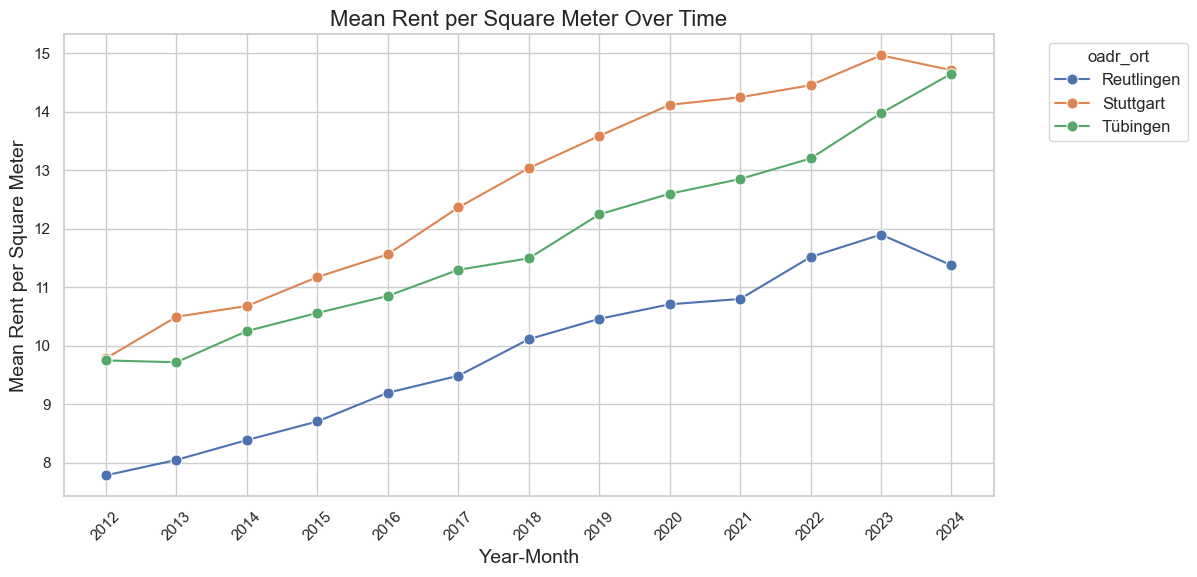

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=new_df_end, x="endyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8, err_style="band", errorbar="ci")

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


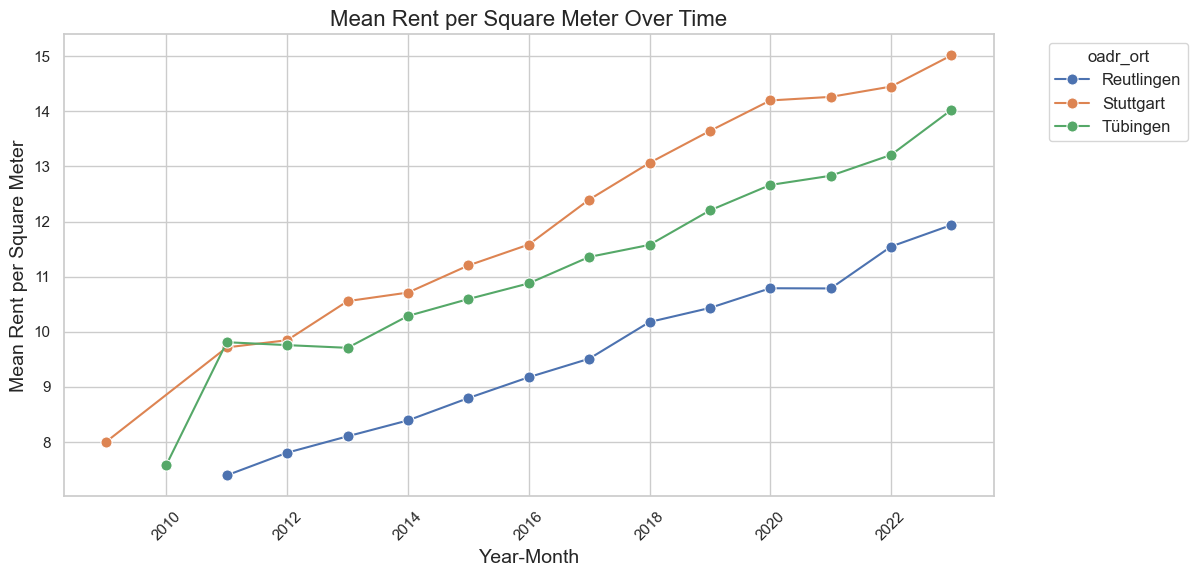

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=new_df_start, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8, err_style="band", errorbar="ci")

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


In [14]:
df_var = df_copy.groupby(["oadr_ort", "startyear"]).agg({"kstn_miete_kalt_pqm": "mean"})
df_var

kstn_miete_kalt_pqm
oadr_ort   startyear                     
Reutlingen 2011                  7.393182
           2012                  7.803780
           2013                  8.101367
           2014                  8.390046
           2015                  8.795412
           2016                  9.173942
           2017                  9.509313
           2018                 10.176236
           2019                 10.431523
           2020                 10.789140
           2021                 10.785568
           2022                 11.546175
           2023                 11.937407
Stuttgart  2009                  8.000000
           2011                  9.715579
           2012                  9.845671
           2013                 10.555113
           2014                 10.710634
           2015                 11.202665
           2016                 11.582403
           2017                 12.397875
           2018                 13.065150
           2019                 13.645068
           2020                 14.198444
           2021                 14.263145
           2022                 14.450292
           2023                 15.017793
Tübingen   2010                  7.585000
           2011                  9.809459
           2012                  9.756507
           2013                  9.707462
           2014                 10.286438
           2015                 10.592906
           2016                 10.877450
           2017                 11.356993
           2018                 11.576410
           2019                 12.202088
           2020                 12.664178
           2021                 12.831255
           2022                 13.209846
           2023                 14.027515

In [26]:
q_low=df_copy["kstn_miete_kalt_pqm"].quantile(0.05)
q_hi=df_copy["kstn_miete_kalt_pqm"].quantile(0.95)

df_filtered = df_copy[(df_copy["kstn_miete_kalt_pqm"] < q_hi) & (df_copy["kstn_miete_kalt_pqm"] > q_low)]

In [116]:
df_var = df_filtered.groupby(["oadr_ort", "startyear"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index()


In [117]:
# get percental increase
df_var["percental_increase"] = df_var.groupby(["oadr_ort"])["kstn_miete_kalt_pqm"].pct_change()
df_var 

,oadr_ort,startyear,kstn_miete_kalt_pqm,percental_increase
0,Reutlingen,2011,8.750000,NaN
1,Reutlingen,2012,8.882494,0.015142
2,Reutlingen,2013,9.045558,0.018358
3,Reutlingen,2014,9.229525,0.020338
4,Reutlingen,2015,9.448914,0.023770
5,Reutlingen,2016,9.675343,0.023964
6,Reutlingen,2017,9.964190,0.029854
7,Reutlingen,2018,10.504375,0.054213
8,Reutlingen,2019,10.687596,0.017442
9,Reutlingen,2020,10.929633,0.022647


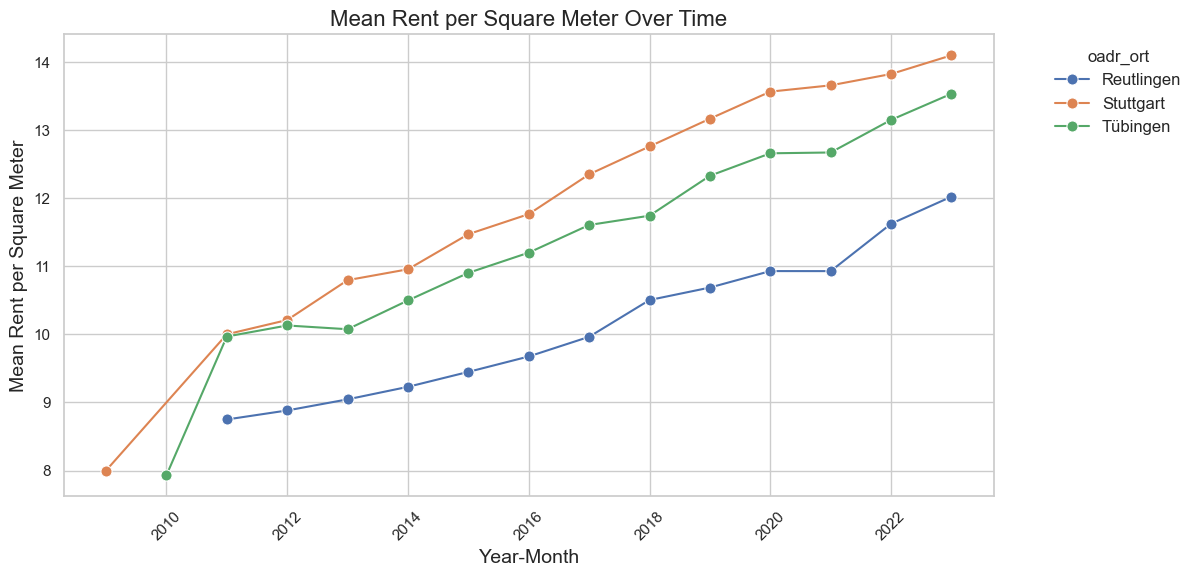

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_var, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8, err_style="band", errorbar="ci")

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


In [130]:
df_var.to_csv("df_var.csv", index=False)

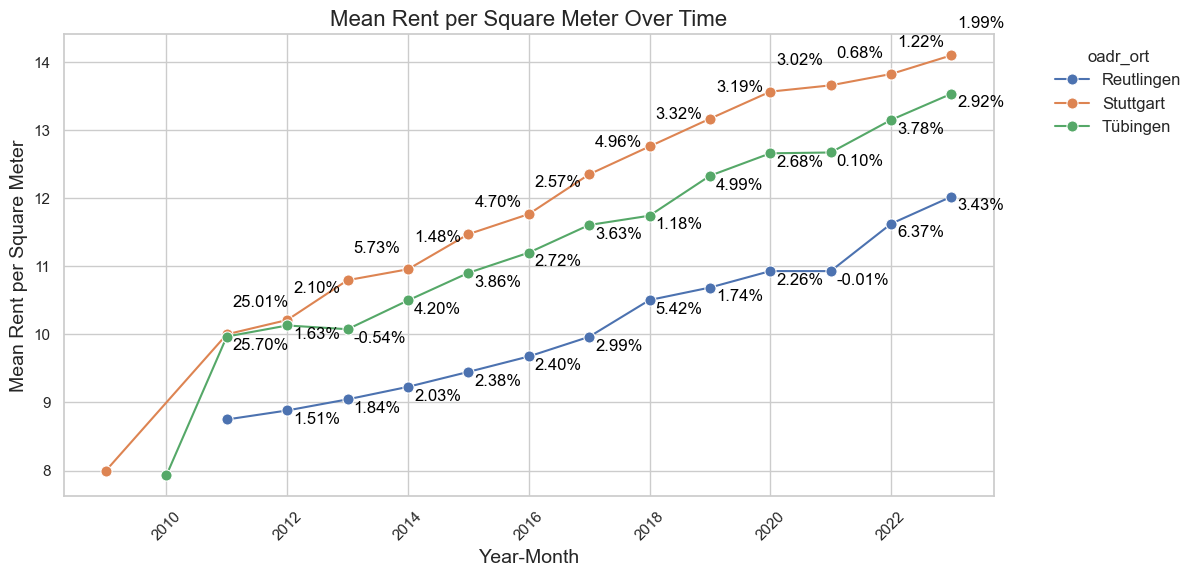

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
cumulative_increases = {}
# Plotting
lineplot = sns.lineplot(data=df_var, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort", marker="o", markersize=8, err_style="band", errorbar="ci")

# Annotating each data point
for oadr_ort, group_data in df_var.groupby('oadr_ort'):
    
    for _, row in group_data.iterrows():
        # Skip NaN values
        if not pd.isna(row['percental_increase']):
            # Format the percentage increase
            percent_text = f"{row['percental_increase'] * 100:.2f}%"

            # Adjust these offsets to position your labels
            x_offset = 0.1  # Adjust this for horizontal positioning
            y_offset = 0.2  # Adjust this for vertical positioning
            if oadr_ort=="Stuttgart":
                y_offset = .4
            if oadr_ort=="Tübingen":
                y_offset = -.2
            if oadr_ort=="Reutlingen":
                y_offset = -.2

            plt.text(row['startyear'] + x_offset, row['kstn_miete_kalt_pqm'] + y_offset, percent_text, 
                     horizontalalignment='left', size='medium', color='black')

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


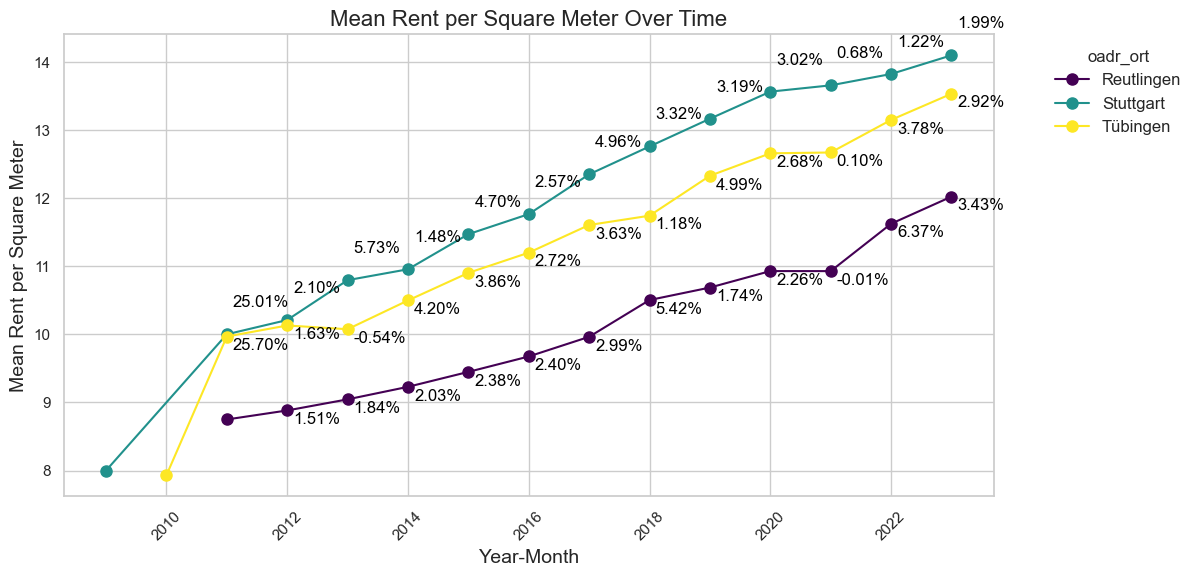

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Assuming df_var is your DataFrame
# Get unique values for 'oadr_ort' for coloring and legend
unique_oadr_ort = df_var['oadr_ort'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_oadr_ort)))
oadr_ort_color = dict(zip(unique_oadr_ort, colors))

# Plotting each group
for oadr_ort, group_data in df_var.groupby('oadr_ort'):
    plt.plot(group_data['startyear'], group_data['kstn_miete_kalt_pqm'], marker='o', markersize=8, label=oadr_ort, color=oadr_ort_color[oadr_ort])

    # Annotating each data point
    for _, row in group_data.iterrows():
        if not pd.isna(row['percental_increase']):
            percent_text = f"{row['percental_increase'] * 100:.2f}%"
            x_offset = 0.1
            y_offset = 0.2
            if oadr_ort == "Stuttgart":
                y_offset = .4
            elif oadr_ort == "Tübingen":
                y_offset = -.2
            elif oadr_ort == "Reutlingen":
                y_offset = -.2

            plt.text(row['startyear'] + x_offset, row['kstn_miete_kalt_pqm'] + y_offset, percent_text, 
                     horizontalalignment='left', size='medium', color='black')

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


## Same but now with median

In [21]:
new_df_start_median = df_copy.groupby(["oadr_ort", "startyear"]).agg({"kstn_miete_kalt_pqm": "median"})
new_df_start_median = new_df_start_median.sort_values(by=["oadr_ort", "startyear"], ascending=True)

In [24]:
new_df_start_median

kstn_miete_kalt_pqm
oadr_ort   startyear                     
Reutlingen 2011                     7.100
           2012                     7.750
           2013                     7.970
           2014                     8.330
           2015                     8.660
           2016                     8.975
           2017                     9.470
           2018                    10.000
           2019                    10.110
           2020                    10.640
           2021                    10.560
           2022                    11.380
           2023                    11.805
Stuttgart  2009                     8.000
           2011                     9.260
           2012                     9.560
           2013                    10.120
           2014                    10.380
           2015                    10.930
           2016                    11.320
           2017                    12.100
           2018                    12.700
           2019                    13.330
           2020                    13.860
           2021                    13.980
           2022                    14.210
           2023                    14.620
Tübingen   2010                     7.585
           2011                     9.630
           2012                     9.620
           2013                     9.775
           2014                    10.120
           2015                    10.470
           2016                    10.800
           2017                    11.240
           2018                    11.370
           2019                    12.200
           2020                    12.500
           2021                    12.500
           2022                    13.030
           2023                    13.750

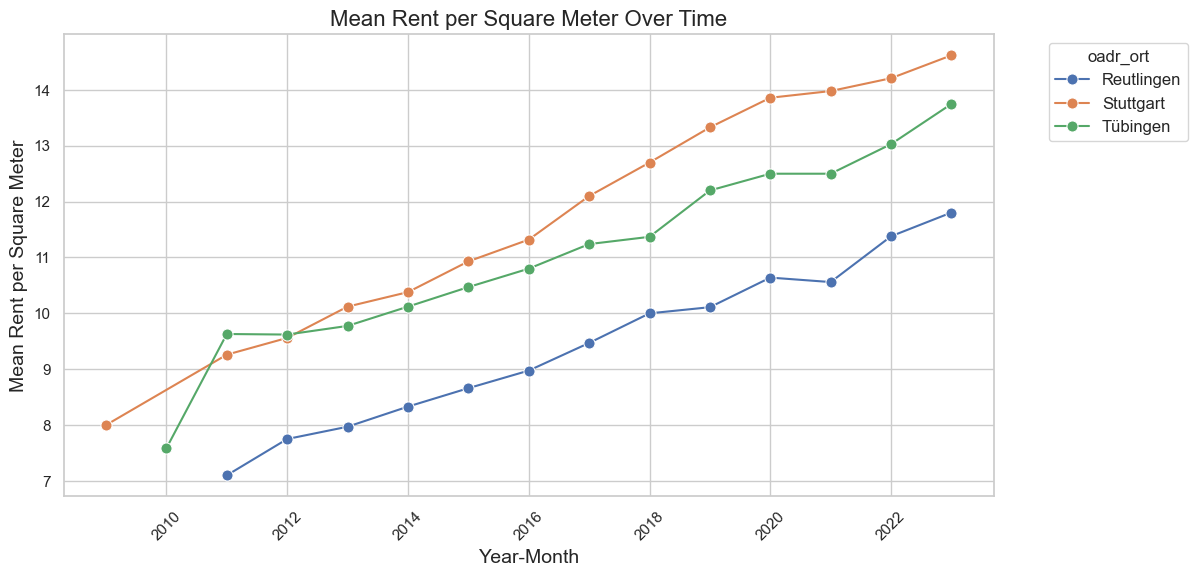

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=new_df_start_median, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Mean Rent per Square Meter Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


In [30]:
df_var

kstn_miete_kalt_pqm
oadr_ort   startyear                     
Reutlingen 2011                  8.750000
           2012                  8.882494
           2013                  9.045558
           2014                  9.229525
           2015                  9.448914
           2016                  9.675343
           2017                  9.964190
           2018                 10.504375
           2019                 10.687596
           2020                 10.929633
           2021                 10.928980
           2022                 11.624655
           2023                 12.023030
Stuttgart  2009                  8.000000
           2011                 10.000993
           2012                 10.210980
           2013                 10.796184
           2014                 10.956095
           2015                 11.471446
           2016                 11.766359
           2017                 12.350427
           2018                 12.760016
           2019                 13.167070
           2020                 13.565061
           2021                 13.657447
           2022                 13.824078
           2023                 14.098653
Tübingen   2010                  7.930000
           2011                  9.968286
           2012                 10.130574
           2013                 10.075557
           2014                 10.498352
           2015                 10.903174
           2016                 11.200029
           2017                 11.606369
           2018                 11.742987
           2019                 12.329362
           2020                 12.659348
           2021                 12.671404
           2022                 13.149963
           2023                 13.534022

## Look at individual rooms

In [106]:
df_flats = df_copy.groupby(["oadr_ort", "startyear", "objekttyp_fein"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index()

In [107]:
df_flats

,oadr_ort,startyear,objekttyp_fein,kstn_miete_kalt_pqm
0,Reutlingen,2011,1-Z-Whg,9.645000
1,Reutlingen,2011,2-Z-Whg,7.705000
2,Reutlingen,2011,3-Z-Whg,7.198571
3,Reutlingen,2011,4-Z-Whg,6.677143
4,Reutlingen,2012,1-Z-Whg,9.052300
...,...,...,...,...
220,Tübingen,2023,2-Z-Whg,13.830380
221,Tübingen,2023,3-Z-Whg,13.374254
222,Tübingen,2023,4+-Z-Whg,12.784231
223,Tübingen,2023,4-Z-Whg,13.195366


In [132]:
df_flats = df_flats[df_flats["objekttyp_fein"] != "kA-Z-Whg"]

In [135]:
df_flats.groupby([""])

,oadr_ort,startyear,objekttyp_fein,kstn_miete_kalt_pqm
0,Reutlingen,2011,1-Z-Whg,9.645000
1,Reutlingen,2011,2-Z-Whg,7.705000
2,Reutlingen,2011,3-Z-Whg,7.198571
3,Reutlingen,2011,4-Z-Whg,6.677143
4,Reutlingen,2012,1-Z-Whg,9.052300
...,...,...,...,...
219,Tübingen,2023,1-Z-Whg,15.634807
220,Tübingen,2023,2-Z-Whg,13.830380
221,Tübingen,2023,3-Z-Whg,13.374254
222,Tübingen,2023,4+-Z-Whg,12.784231


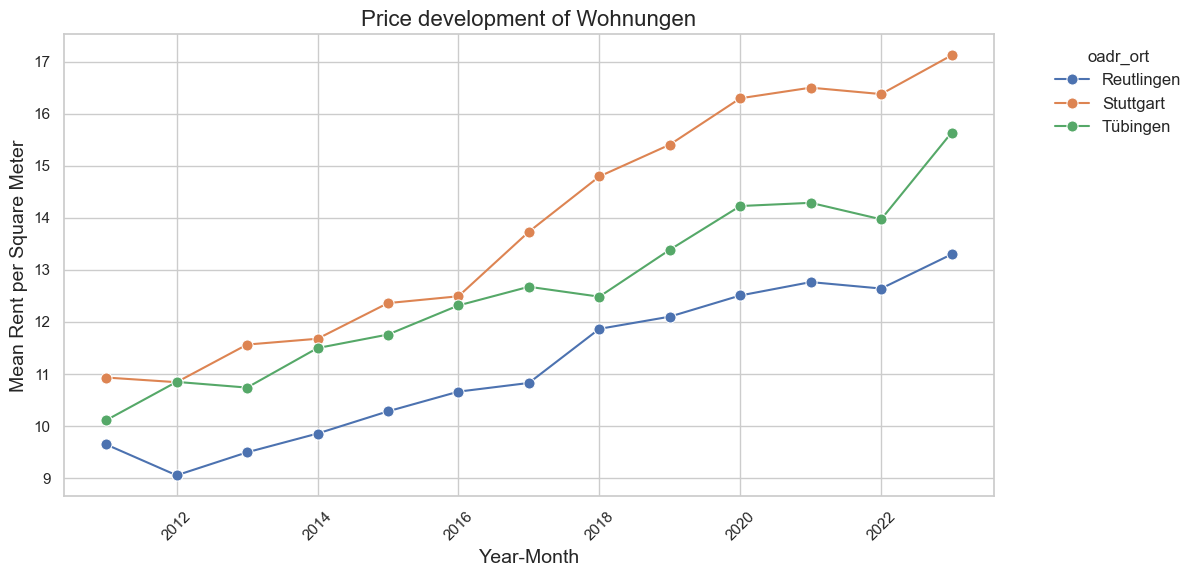

In [138]:
df_flats_1 = df_flats[df_flats["objekttyp_fein"] == "1-Z-Whg"]
df_flats_1_agg = df_flats_1.groupby(["oadr_ort", "startyear", "objekttyp_fein"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index()
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_1_agg, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


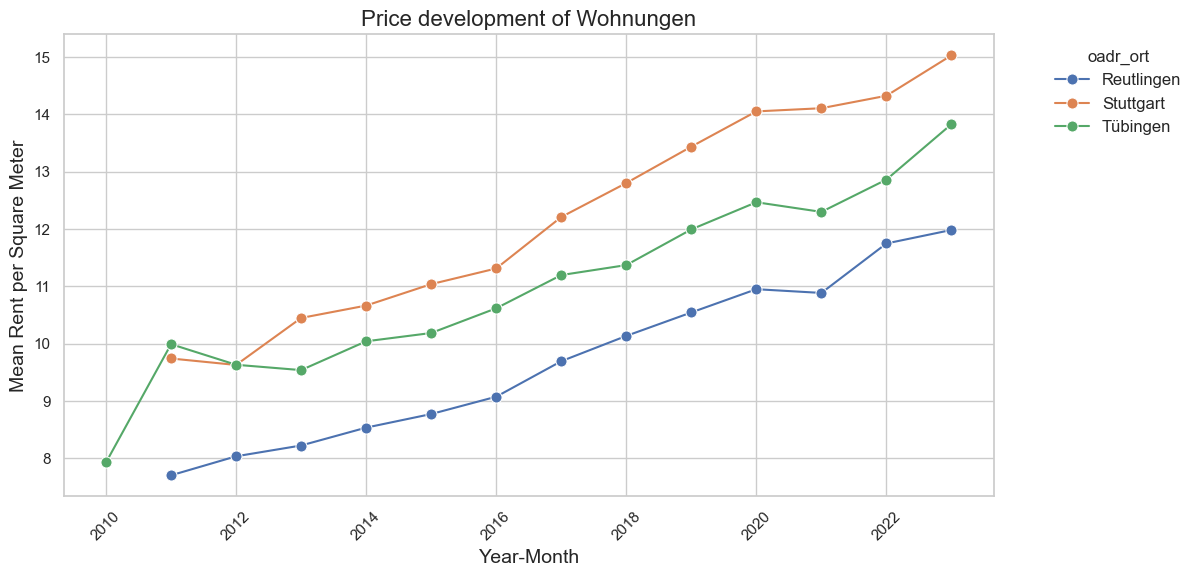

In [140]:
df_flats_2 = df_flats[df_flats["objekttyp_fein"] == "2-Z-Whg"]
df_flats_2_agg = df_flats_2.groupby(["oadr_ort", "startyear", "objekttyp_fein"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index()
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_2_agg, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


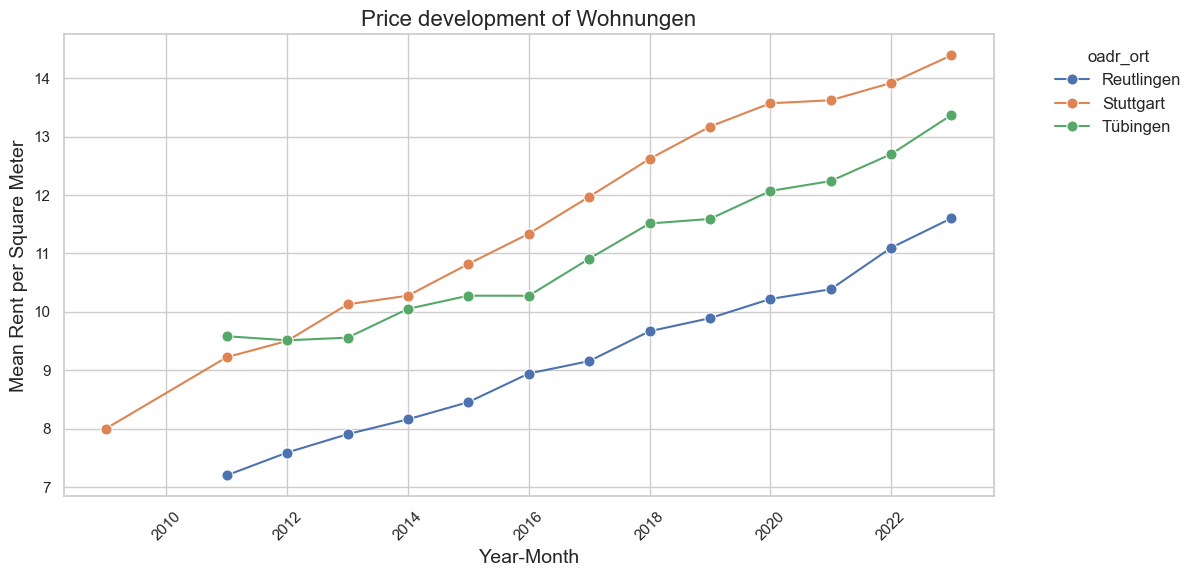

In [141]:
df_flats_3 = df_flats[df_flats["objekttyp_fein"] == "3-Z-Whg"]
df_flats_3_agg = df_flats_3.groupby(["oadr_ort", "startyear", "objekttyp_fein"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index()
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_3_agg, x="startyear", y="kstn_miete_kalt_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


In [108]:
df_flats_tue = df_flats[df_flats["oadr_ort"] == "Tübingen"] 
# delete kA-Z-Whg
df_flats_tue = df_flats_tue[df_flats_tue["objekttyp_fein"] != "kA-Z-Whg"]

In [109]:
df_flats_tue

,oadr_ort,startyear,objekttyp_fein,kstn_miete_kalt_pqm
151,Tübingen,2010,2-Z-Whg,7.930000
152,Tübingen,2010,4-Z-Whg,7.240000
153,Tübingen,2011,1-Z-Whg,10.110000
154,Tübingen,2011,2-Z-Whg,9.992500
155,Tübingen,2011,3-Z-Whg,9.581538
...,...,...,...,...
219,Tübingen,2023,1-Z-Whg,15.634807
220,Tübingen,2023,2-Z-Whg,13.830380
221,Tübingen,2023,3-Z-Whg,13.374254
222,Tübingen,2023,4+-Z-Whg,12.784231


In [110]:
df_flats_tue.groupby(["startyear", "objekttyp_fein"]).agg({"kstn_miete_kalt_pqm": "mean", "kstn_miete_kalt_pqm": "count"}).reset_index()

,startyear,objekttyp_fein,kstn_miete_kalt_pqm
0,2010,2-Z-Whg,1
1,2010,4-Z-Whg,1
2,2011,1-Z-Whg,1
3,2011,2-Z-Whg,1
4,2011,3-Z-Whg,1
...,...,...,...
61,2023,1-Z-Whg,1
62,2023,2-Z-Whg,1
63,2023,3-Z-Whg,1
64,2023,4+-Z-Whg,1


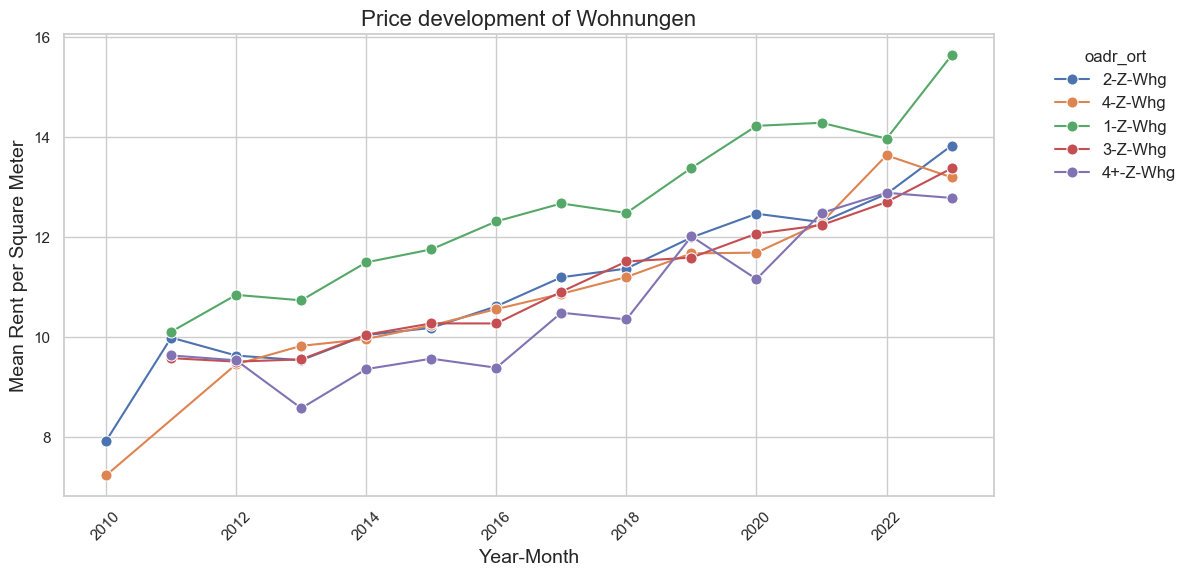

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_tue, x="startyear", y="kstn_miete_kalt_pqm", hue="objekttyp_fein",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


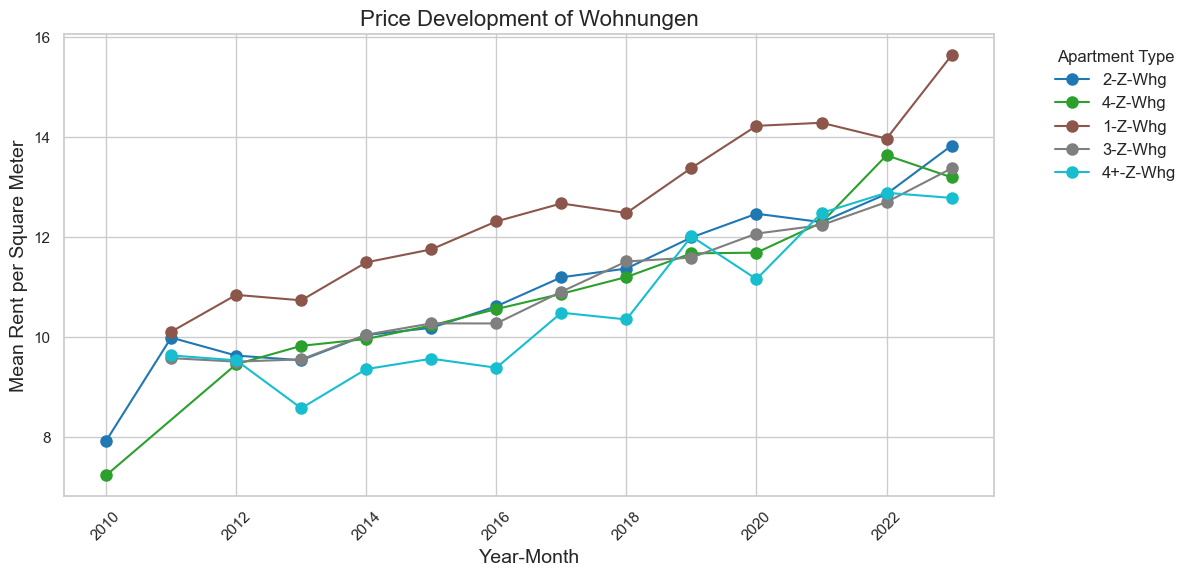

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

unique_objekttyp_fein = df_flats_tue['objekttyp_fein'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_objekttyp_fein)))  # Generating a color map

plt.figure(figsize=(12, 6))

for i, typ in enumerate(unique_objekttyp_fein):
    # Filter data for each apartment type
    data = df_flats_tue[df_flats_tue['objekttyp_fein'] == typ]
    plt.plot(data['startyear'], data['kstn_miete_kalt_pqm'], marker='o', color=colors[i], label=typ, markersize=8)

# Enhancing the plot
plt.title('Price Development of Wohnungen', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Apartment Type', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


## make bar plot that shows increase from 2013 to 2023

## Where are these flats

In [69]:
df_tue = df_copy[df_copy["oadr_ort"] == "Tübingen"]
df_tue = df_tue[df_tue["objekttyp_fein"] != "kA-Z-Whg"]

In [71]:
df_tue

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,startyear,endyear
13,3600335162,1.0,2.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,NaN,43.0,0.0,NaN,43.0,650.0,15.12,0,NaN,NaN,NaN,0.2,NaN,miete,Wohn,8,8416041,8416,200.0,650.0,850.0,19.77,15.12,NaN,NaN,NaN,Tübingen,Tübingen,72070,NaN,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-30,WHG_M,0,0,0,0,0,1,0,0,-1,2024-01-05,1,0,-1,2023,2024
25,3600015008,NaN,2.0,0,1,0,1,0,0,0,0,0,0,Gas,0,0,0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,1980.0,58.0,2.0,3.0,58.0,870.0,15.00,0,NaN,NaN,170.0,0.2,NaN,miete,Wohn,8,8416041,8416,170.0,870.0,1040.0,17.93,15.00,NaN,NaN,2.93,Tübingen,Tübingen,72070,Tübingen,Zentrum,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,1,0,NaN,0,2023-12-30,WHG_M,0,0,0,0,0,1,0,0,1,2024-01-02,0,0,0,2023,2024
34,3600573075,1.0,1.0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,NaN,37.0,NaN,NaN,37.0,510.0,13.78,0,NaN,NaN,NaN,0.4,NaN,miete,Wohn,8,8416041,8416,145.0,510.0,655.0,17.70,13.78,NaN,NaN,NaN,Tübingen,Tübingen,72072,NaN,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-29,WHG_M,0,0,0,0,0,1,0,0,0,NaN,1,0,0,2023,NaN
36,3600507111,NaN,2.5,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,55.0,NaN,NaN,55.0,1000.0,18.18,0,NaN,NaN,100.0,0.4,NaN,miete,Wohn,8,8416041,8416,200.0,1000.0,1200.0,21.82,18.18,NaN,NaN,1.82,Tübingen,Tübingen,72072,Lustnau,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-29,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2023,NaN
55,3600435949,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,Zentral,0,0,0,0,0,0,0,0,0,0,0,0,1984.0,42.0,-0.5,NaN,42.0,560.0,13.33,0,NaN,NaN,NaN,0.5,NaN,miete,Wohn,8,8416041,8416,80.0,560.0,640.0,15.24,13.33,NaN,NaN,NaN,Tübingen,Tübingen,72076,NaN,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,1,0,0,NaN,0,2023-12-28,WHG_M,0,0,0,0,0,0,0,0,-1,NaN,0,0,0,2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106694,60855988,NaN,2.0,0,1,0,0,0,0,0,0,0,0,Elektro,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1957.0,48.0,NaN,NaN,48.0,420.0,8.75,0,NaN,NaN,NaN,31.7,31.7,miete,Wohn,8,8416041,8416,50.0,420.0,470.0,9.79,8.75,NaN,NaN,NaN,Tübingen,Tübingen,72074,Tübingen,Universität,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2011-08-02,WHG_M,0,0,0,0,0,1,0,0,0,2012-03-

In [78]:
df_tue_hist = df_tue.groupby(["oadr_u2","objekttyp_fein" ]).size().reset_index(name="count").sort_values(by=["count"], ascending=False)
df_tue_hist

,oadr_u2,objekttyp_fein,count
79,Universität,2-Z-Whg,374
99,Weststadt,2-Z-Whg,283
78,Universität,1-Z-Whg,257
104,Zentrum,2-Z-Whg,232
75,Südstadt,3-Z-Whg,217
...,...,...,...
34,Gartenstadt,1-Z-Whg,2
111,Österberg/Gartenstraße,4+-Z-Whg,2
96,Weilheim,4+-Z-Whg,1
36,Gartenstadt,3-Z-Whg,1


<Axes: xlabel='count', ylabel='Count'>

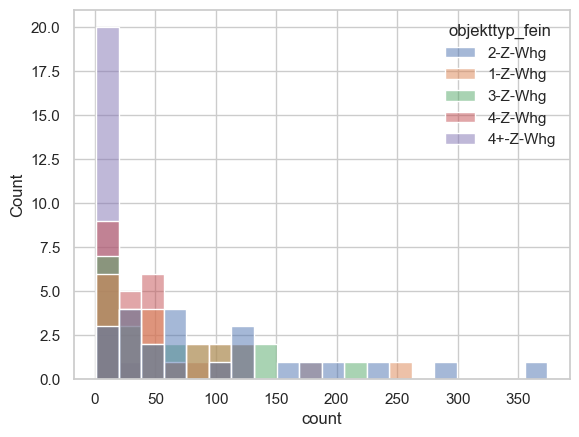

In [80]:
sns.histplot(data=df_tue_hist, x="count", hue="objekttyp_fein", color="oadr_u2", bins=20)

In [84]:
df_tue[df_tue["endyear"]=="2023"].groupby(["oadr_u2"]).agg({"kstn_miete_kalt_pqm": "mean"}).reset_index().sort_values(by=["kstn_miete_kalt_pqm"], ascending=False)

,oadr_u2,kstn_miete_kalt_pqm
1,Au/Unterer Wert/Französiches Viertel,15.772059
4,De-Zentrum,15.050000
0,Aeule,14.446667
19,Weststadt,14.249420
17,Wanne,14.226735
21,Österberg/Gartenstraße,14.083636
7,Hagelloch,14.043000
15,Universität,14.024795
20,Zentrum,14.004000
14,Südstadt,13.928617


In [95]:
df_tue[df_tue["endyear"].isin(["2023"])].groupby("oadr_u2").agg(
    mean_kstn_miete_kalt_pqm=("kstn_miete_kalt_pqm", "mean"),
    count=("kstn_miete_kalt_pqm", "count")
).reset_index().sort_values(by="mean_kstn_miete_kalt_pqm", ascending=False)


,oadr_u2,mean_kstn_miete_kalt_pqm,count
1,Au/Unterer Wert/Französiches Viertel,15.772059,34
4,De-Zentrum,15.050000,9
0,Aeule,14.446667,3
19,Weststadt,14.249420,69
17,Wanne,14.226735,49
21,Österberg/Gartenstraße,14.083636,11
7,Hagelloch,14.043000,10
15,Universität,14.024795,73
20,Zentrum,14.004000,55
14,Südstadt,13.928617,94


ValueError: Invalid color argument: Series([], Name: difference, dtype: float64)

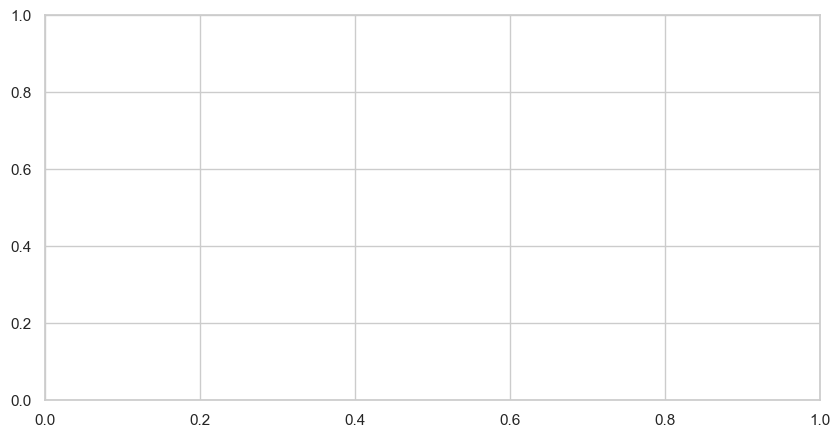

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data in the format provided

# Convert to DataFrame
df_tue

# Filter the years 2020 and 2021
df_2020 = df_tue[df_tue["startyear"] == "2020"]
df_2021 = df_tue[df_tue["startyear"] == "2021"]

# Merge the data for 2020 and 2021 on 'objekttyp_fein'
merged_df = df_2020.merge(df_2021, on="objekttyp_fein", suffixes=('_2020', '_2021'))

# Calculate the difference
merged_df['difference'] = merged_df['kstn_miete_kalt_pqm_2021'] - merged_df['kstn_miete_kalt_pqm_2020']

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# We need to have a midpoint that is clearly defined, in this case, it can be 0.
midpoint = 0

# Create the diverging bars
merged_df.plot.barh(
    x='objekttyp_fein',
    y='difference',
    ax=ax,
    color=merged_df['difference'].apply(lambda x: 'blue' if x >= midpoint else 'red'),
    legend=False
)

# Add labels and title
ax.set_xlabel('Change in kstn_miete_kalt_pqm from 2020 to 2021')
ax.set_ylabel('Apartment Type')
ax.set_title('Diverging Bar Chart of Rent Price Changes')

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Draw a vertical line at the midpoint (0)
ax.axvline(midpoint, color='grey', linestyle='--')

# Annotate the bars with the difference values
for idx, row in merged_df.iterrows():
    ax.text(row['difference'], idx, f"{row['difference']:.2f}", va='center', ha='right' if row['difference'] < 0 else 'left')

plt.show()

